The objective of this lab is to compare the alignment of the `mixed_reads` files with the human reference genome against that of the S. oneidensis reference genome. We will also generate a coverage plot based on the `SAM` output file generated using `Bowtie2`. `SAMtools` will be helpful for working with the `SAM` files.

The terminal commands below copy the data files into the local `Lab 6` directory for convenient access.

`[5450915@ip-172-30-0-105 Lab6_data]$ cp * ~/Lab\ 6`

`[5450915@ip-172-30-0-105 hg19]$ cp * ~/Lab\ 6`

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ cp * ~/Lab\ 6`

## Alignment with human genome

This `bowtie2` command runs the program for the `mixed_reads` input reads and against the `hg19` database. It outputs to `hg19_output.sam` with the unaligned reads written into `hg19_unaligned.fastq`. That is, the reads in `hg19_unaligned.fastq` do not align with the human genome.

`[5450915@ip-172-30-0-105 hg19]$ bowtie2 -p 16 --very-fast --no-unal -x hg19 -U ../mixed_reads1.fastq,../mixed_reads2.fastq -S hg19_output.sam --un hg19_unaligned.fastq
2570882 reads; of these:
  2570882 (100.00%) were unpaired; of these:
    2060197 (80.14%) aligned 0 times
    468483 (18.22%) aligned exactly 1 time
    42202 (1.64%) aligned >1 times
19.86% overall alignment rate`

The output shows that $19.86\text{%}$ of the sequencing library came from contaminated human DNA.

## Alignment with S. oneidensis genome

This `bowtie2` command runs the program for the `hg19_unaligned.fastq` filtered input reads and the `shewanella_oneidensis_mr-1` database. That is, we used pass the reads that do not align with the human genome into `bowtie2` as the new input. It outputs to `shewanella_oneidensis_mr-1_output.sam` with the unaligned reads written into `shewanella_oneidensis_mr-1_unaligned.fastq`. 

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ bowtie2 -p 16 --very-fast --no-unal -x shewanella_oneidensis_mr-1 -U ../hg19/hg19_unaligned.fastq -S shewanella_oneidensis_mr-1_output.sam --un shewanella_oneidensis_mr-1_unaligned.fastq 
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    733772 (35.62%) aligned 0 times
    1238875 (60.13%) aligned exactly 1 time
    87550 (4.25%) aligned >1 times
64.38% overall alignment rate`

The output shows that  $35.62\text{%}$ of the filtered library did not align with the reference genome.

Below is an identical `bowtie2` command with the exception of the `--very-fast` parameter being changed to the `--very-sensitive` parameter. The results are similar; however, the percentage of reads that did not align has decreased from $35.62\text{%}$ to $35.37\text{%}$, which is to be expected.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ bowtie2 -p 16 --very-sensitive --no-unal -x shewanella_oneidensis_mr-1 -U ../hg19/hg19_unaligned.fastq -S shewanella_oneidensis_mr-1_output.sam --un shewanella_oneidensis_mr-1_unaligned.fastq
2060197 reads; of these:
  2060197 (100.00%) were unpaired; of these:
    728613 (35.37%) aligned 0 times
    1242169 (60.29%) aligned exactly 1 time
    89415 (4.34%) aligned >1 times
64.63% overall alignment rate`

## Coverage plot

The following command uses `SAMtools` to generate a `.bam` file named `shewanella_oneidensis_mr-1_output.bam` from `shewanella_oneidensis_mr-1_output.sam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools view -b shewanella_oneidensis_mr-1_output.sam > shewanella_oneidensis_mr-1_output.bam`

Next, we sort `shewanella_oneidensis_mr-1_output.bam` and output to `shewanella_oneidensis_mr-1_output_sorted.bam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools sort shewanella_oneidensis_mr-1_output.bam > shewanella_oneidensis_mr-1_output.sorted.bam`

Next, we index `shewanella_oneidensis_mr-1_output.sorted.bam`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools index shewanella_oneidensis_mr-1_output.sorted.bam`

Finally, we generate a list of coordinates and the number of reads aligned at each position in `coverage.tab`.

`[5450915@ip-172-30-0-105 shewanella_oneidensis_mr-1]$ samtools depth –a shewanella_oneidensis_mr-1_output,sorted.bam > coverage.tab`

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

depths = []
coverage_file = open("shewanella_oneidensis_mr-1/coverage.tab", "r")
for line in coverage_file:
    entries = line.split()
    depths.append(int(entries[2]))
depths = np.asarray(depths)

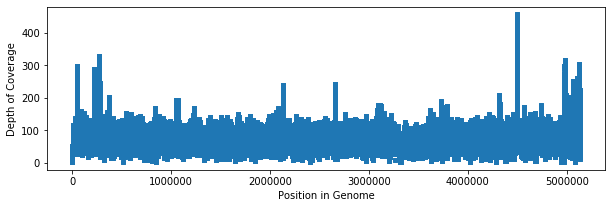

In [2]:
plt.rcParams['figure.figsize'] = 10, 3
plt.xlabel("Position in Genome")
plt.ylabel("Depth of Coverage")
plt.scatter(range(len(depths)), depths, s=10, marker="s")
plt.show()

(0, 300)

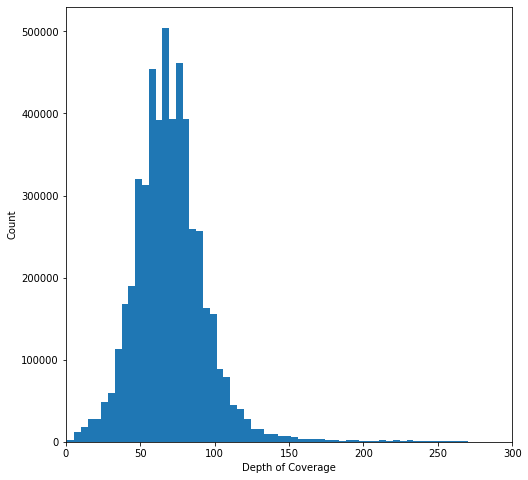

In [3]:
plt.rcParams['figure.figsize'] = 8, 8
plt.xlabel("Depth of Coverage")
plt.ylabel("Count")
hist = plt.hist(depths, bins=100)
plt.xlim(0, 300)